In [1]:
#Imported Libraies need to complete project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Question 
How has the wealth of the ultra-rich changed over the years across multiple industries and countries since the turn of the century?

### Objectives

- Obtain Data
- Exploratory Data Analysis
- Clean Data
- Analyze Data
- Write Summary Report

### References
Servera, Guillem. (2023, August). Forbes Billionaires Evolution (1997-2023), Version 1. Retrieved August 18, 2023 from https://www.kaggle.com/datasets/guillemservera/forbes-billionaires-1997-2023.


#### Obtaining the data

In [2]:
#Read csv file into Pandas DataFrame
df = pd.read_csv("all_billionaires_1997_2023.csv")

For this part of the project, I read a CSV file that I downloaded from Kaggle into a Pandas DataFrame. 

#### Exploratory Data Analysis

In [3]:
#Explored the first few rows of the DataFrame
df.head()

,year,month,rank,net_worth,last_name,first_name,full_name,birth_date,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_category,business_industries,organization_name,position_in_organization,self_made,wealth_status
0,1997,7,NaN,2.0 B,Sophonpanich,Chatri,Chatri Sophonpanich & family,1934-02-28,73.0,Male,Thailand,Thailand,Bangkok,Finance and Investments,['Finance and Investments'],NaN,NaN,False,NaN
1,1997,7,NaN,1.8 B,Adulyadej,King Bhumibol,King Bhumibol Adulyadej,1927-12-05,69.0,Male,Thailand,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
2,1998,7,NaN,3.3 B,Safra,Edmond,Edmond Safra,1932-08-06,65.0,Male,Lebanon,Lebanon,NaN,NaN,NaN,NaN,NaN,True,NaN
3,1999,7,NaN,1.0 B,Hinduja,"Srichand, Gopichand,",Srichand & Gopichand Hinduja,1935-11-28,NaN,NaN,India,United Kingdom,London,NaN,NaN,NaN,NaN,False,NaN
4,1999,7,NaN,7.1 B,Schwarz,Dieter,Dieter Schwarz,1939-09-24,59.0,Male,Germany,Germany,Neckarsulm,Fashion & Retail,['Fashion & Retail'],NaN,NaN,True,NaN


In [4]:
#Exploring a random sample of the DataFrame
df.sample(10)

,year,month,rank,net_worth,last_name,first_name,full_name,birth_date,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_category,business_industries,organization_name,position_in_organization,self_made,wealth_status
30113,2023,4,982.0,3.0 B,Varkey,Sunny,Sunny Varkey,1957-04-09,65.0,Male,India,United Arab Emirates,Dubai,Service,['Service'],NaN,NaN,False,Increased
23670,2021,4,2.0,151.0 B,Musk,Elon,Elon Musk,1971-06-28,49.0,Male,United States,United States,Austin,Automotive,['Automotive'],Tesla,CEO and Chairman,True,Increased
26569,2022,4,146.0,12.7 B,Chen,Bang,Chen Bang,1965-09-01,56.0,Male,China,China,Changsha,Healthcare,['Healthcare'],NaN,NaN,True,Decreased
6206,2011,3,179.0,5.7 B,Gou,Terry,Terry Gou,1950-10-18,60.0,Male,Taiwan,Taiwan,Taipei,NaN,['Technology'],NaN,NaN,True,Increased
26788,2022,4,363.0,6.8 B,Gray,Jonathan,Jonathan Gray,1970-02-04,52.0,Male,United States,United States,New York,Finance & Investments,['Finance & Investments'],NaN,NaN,True,Increased
3938,2008,3,605.0,2.0 B,NaN,NaN,Suna Kirac,NaN,66.0,NaN,Turkey,Turkey,Istanbul,NaN,NaN,NaN,NaN,NaN,NaN
28540,2022,4,2076.0,1.4 B,Jiang,Yintai,Yintai Jiang & family,1950-07-30,71.0,Male,China,China,Shanghai,Automotive,['Automotive'],NaN,NaN,True,Decreased
15031,2016,3,1577.0,1.1 B,Tang,Hsiang-chien,Tang Hsiang-chien,1923-04-01,92.0,Male,Hong Kong,Hong Kong,Hong Kong,Manufacturing,['Manufacturing'],NaN,NaN,True,Decreased
5499,2010,3,463.0,2.1 B,Sahenk,Ferit,Ferit Faik Sahenk,1964-03-18,46.0,Male,Turkey,Turkey,Istanbul,NaN,['Finance'],NaN,NaN,False,Increased
7843,2012,3,601.0,2.1 B,Benetton,Luciano,Luciano Benetton,1935-05-13,76.0,Male,Italy,Italy,Treviso,Fashion & Retail,['Fashion & Retail'],NaN,Entrepreneur,True,Decreased


In [5]:
#Checking for how many null values are in each column
df.isnull().sum()

year                            0
month                           0
rank                           18
net_worth                       0
last_name                    3689
first_name                   3747
full_name                       0
birth_date                   4404
age                           675
gender                       3829
country_of_citizenship          9
country_of_residence          702
city_of_residence             935
business_category            5843
business_industries           990
organization_name           27344
position_in_organization    27040
self_made                    3689
wealth_status                7146
dtype: int64

In [6]:
#Explored the types of data in the DataFrame
df.dtypes

year                          int64
month                         int64
rank                        float64
net_worth                    object
last_name                    object
first_name                   object
full_name                    object
birth_date                   object
age                         float64
gender                       object
country_of_citizenship       object
country_of_residence         object
city_of_residence            object
business_category            object
business_industries          object
organization_name            object
position_in_organization     object
self_made                    object
wealth_status                object
dtype: object

Next, I moved over to data exploration using the head, sample, and isnull methods as well as the dtypes attribute, and found some abnormalities that I will correct in the data cleaning phase.
There are a large number of null values in the data especially in the "organization_name" and "position_in_organization" columns.
- The "net_worth" column is an object instead of the more suitable dtype float.
- The "age" column is a float rather than int.
- The "business_industries" has extra whitespace, and formats text within and inconsistently.
- The "self_made" column has the dtype of int rather than the bool to represent True or False.
- And while not an abnormality, the data starts in 1997, but I only need to analyze billionaires from after the turn of the century.


#### Data Cleaning

In [7]:
#Trimming down the Dataframe to only contain data from the 21st century
df = df[df["year"] >= 2000]

In [8]:
#Changed the "self_made" column from object to bool data type
df["self_made"] = df["self_made"].astype(bool)

In [9]:
#Changed the "net_worth" column from object to float
df["net_worth"] = df["net_worth"].str.replace(" B", "").astype(float)

In [10]:
#Changed the "business_industries" values to a cleaner format 
df["business_industries"] = df["business_industries"].str[2:-2]

In [11]:
#Changed "and" to "&" in the "business_industries" column 
df["business_industries"] = df["business_industries"].str.replace(" and ", " & ")

In [12]:
#Changed "#38;" to "" in the "business_industries" column
df["business_industries"] = df["business_industries"].str.replace("#38;", "")

In [13]:
#Removed extra whitspace from "business_industries"
df["business_industries"] = df["business_industries"].str.strip()

In [14]:
#Dropped an unnecessary column
df.drop(axis= 1, columns="business_category")

,year,month,rank,net_worth,last_name,first_name,full_name,birth_date,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_industries,organization_name,position_in_organization,self_made,wealth_status
11,2000,7,NaN,1.0,Cutrale,Jose,Jose Luis Cutrale,1946-09-17,NaN,Male,Brazil,Brazil,Sao Paulo,Food & Beverage,NaN,NaN,True,NaN
12,2000,7,NaN,1.9,Ebner,Martin,Martin Ebner,1945-08-01,54.0,Male,Switzerland,Switzerland,Wilen,Finance & Investments,NaN,NaN,False,NaN
13,2000,7,NaN,4.5,Henkel,NaN,Christoph Henkel,1958-02-11,NaN,NaN,Germany,United Kingdom,London,Fashion & Retail,NaN,NaN,False,NaN
14,2000,7,NaN,2.9,Vik,Alexander,Alexander Vik,1955-02-19,45.0,Male,Norway,Monaco,Monaco,Finance & Investments,NaN,Investor,False,NaN
15,2000,7,NaN,1.2,Noda,Masahiro,Masahiro Noda,1938-08-24,61.0,Male,Japan,Japan,Tokyo,Technology,NaN,NaN,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31727,2023,4,2540.0,1.0,Yu,Rong,Yu Rong,1971-12-14,51.0,Male,China,China,Shanghai,Healthcare,NaN,NaN,True,Decreased
31728,2023,4,2540.0,1.0,Yuengling,Richard,"Richard Yuengling, Jr.",1943-03-10,80.0,Male,United States,United States,Pottsville,Food & Beverage,NaN,NaN,False,Remained Even
31729,2023,4,2540.0,1.0,Zhang,Gongyun,Zhang Gongyun,1962-12-18,60.0,Male,China,China,Gaomi,Manufacturing,NaN,NaN,True,Returned to List
31730,2023,4,2540.0,1.0,Zhang,Guiping,Zhang Guiping & family,1951-08-21,71.0,Male,China,China,Nanjing,Real Estate,NaN,NaN,True,Decreased


In [15]:
#Creating a new variable to store a DataFrame without nulls in the "business_industries" column
business_industries_df = df[df["business_industries"] != None]

In [16]:
#Finding the richest by year
df[df["rank"]== 1].head()

,year,month,rank,net_worth,last_name,first_name,full_name,birth_date,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_category,business_industries,organization_name,position_in_organization,self_made,wealth_status
19,2001,7,1.0,58.7,Gates,William,Bill Gates,1955-10-28,45.0,Male,United States,United States,Medina,NaN,Technology,NaN,NaN,False,NaN
354,2002,3,1.0,52.8,Gates,William,Bill Gates,1955-10-28,46.0,Male,United States,United States,Medina,NaN,Technology,NaN,NaN,False,Decreased
687,2003,3,1.0,40.7,Gates,William,Bill Gates,1955-10-28,47.0,Male,United States,United States,Medina,NaN,Technology,NaN,NaN,False,Decreased
1019,2004,3,1.0,46.6,Gates,William,Bill Gates,1955-10-28,48.0,Male,United States,United States,Medina,NaN,Technology,NaN,NaN,False,Increased
1451,2005,3,1.0,46.5,Gates,William,Bill Gates,1955-10-28,49.0,Male,United States,United States,Medina,NaN,Technology,NaN,NaN,False,Decreased


In [17]:
#Finding the net_worth of the richest person in 2000 
richest_2000 = df[df["year"] == 2000]["net_worth"].max()
#Setting the rank of the richest person of 2000 to 1
df.loc[(df["year"] == 2000) & (df["net_worth"] == richest_2000), "rank"] = 1

To clean the data, I started by removing irrelevant years so that my final DataFrame would only include the years 2000 and onward. Then I changed the data types of the "net_worth", and "self_made" columns to float and bool respectively. Next, I updated the "business_industries" column so that it no longer had extra whitespaces and removed/replaced any other unnecessary characters. Then I dropped the "business_catogories" column, and lastly, I found the richest person of the year 2000 and set their "rank" to 1.

To clean the data:
- I started by removing irrelevant years so that my final DataFrame would only include the years 2000 and onward. 
- I changed the data types of the "net_worth", and "self_made" columns to float and bool respectively.
- I updated the "business_industries" column so that it no longer had extra whitespaces, and I removed/replaced any other unnecessary characters.
- I dropped the "business_catogories" column.
- Lastly, I found the richest person of the year 2000 and set their "rank" to 1.

#### Data Analysis & Visualization

In [18]:
#Counting the number of billionaires in each industry
business_industries_df.groupby("business_industries")[["net_worth"]].count().sort_values(by = "net_worth", ascending= False).rename(columns={"net_worth": "number of billionaires"})

,number of billionaires
business_industries,
Finance & Investments,3224
Fashion & Retail,2941
Manufacturing,2818
Technology,2799
Real Estate,2688
Diversified,2155
Food & Beverage,2094
Healthcare,1531
Energy,1292


The above table shows the number of billionaires in each industry from 2000-2023.

In [19]:
#Grouping the "business_industries" column by year
business_industries_by_year_df = business_industries_df.groupby(["business_industries", "year"])[["net_worth"]].count().sort_values(by = "net_worth", ascending= False).rename(columns={"net_worth": "number of billionaires"})

In [20]:
#Finding the industry with the highest number of billionaires each year and storing it as a dictionary
year_df = {}
print("The industries that produced the highest number of billionaires by year:")
for i in business_industries_df["year"].unique():
    year_df[i] = [business_industries_by_year_df["number of billionaires"].loc[:,i].index[0], business_industries_by_year_df["number of billionaires"].loc[:,i][0]]
    print("{} - {} {} ".format(i, year_df[i][0], year_df[i][1]))


The industries that produced the highest number of billionaires by year:
2000 - Finance & Investments 2 
2001 - Finance 39 
2002 - Media 34 
2003 - Finance 32 
2004 - Media 45 
2005 - Finance 50 
2006 - Finance 62 
2007 - Finance 75 
2008 - Investments 118 
2009 - Investments 98 
2010 - Investments 132 
2011 - Investments 133 
2012 - Fashion & Retail 123 
2013 - Fashion & Retail 156 
2014 - Fashion & Retail 196 
2015 - Fashion & Retail 230 
2016 - Finance & Investments 268 
2017 - Finance & Investments 296 
2018 - Finance & Investments 310 
2019 - Finance & Investments 306 
2020 - Finance & Investments 298 
2021 - Finance & Investments 372 
2022 - Finance & Investments 392 
2023 - Finance & Investments 372 


In [21]:
#DataFrame of the richest person in the world by year
richest_by_year = df[df["rank"]== 1]

In [22]:
#Variable holding the number of countries that have at least one billionaire
unique_countries = len(df["country_of_citizenship"].unique())

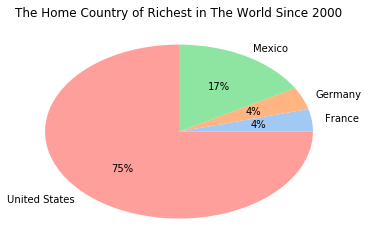

In [23]:
#Pie chart of the home countries of the people who held the title of the richest in the world
#Define data
data = richest_by_year.groupby("country_of_citizenship")["full_name"].count()
#Set labels
labels = richest_by_year.groupby("country_of_citizenship")["full_name"].count().index

#Define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#Create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
#Displaying the title
plt.title("The Home Country of Richest in The World Since 2000")
plt.show()

In [24]:
print("While {} different countries have at least one billionaire, the title of the richest person in the world has only been held by people originating from 4 countries, {}, {}, {}, and the {} over the past 23 years.".format(unique_countries, labels[0], labels[1], labels[2], labels[3]))

While 89 different countries have at least one billionaire, the title of the richest person in the world has only been held by people originating from 4 countries, France, Germany, Mexico, and the United States over the past 23 years.


[Text(0.5,1,'The Industry of The Richest in The World Since 2000')]

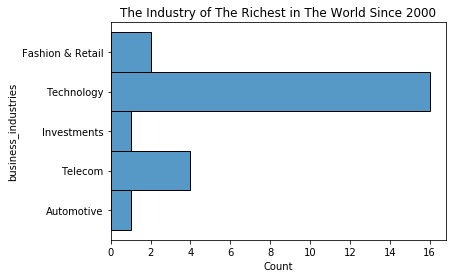

In [25]:
sns.histplot(data=richest_by_year, y="business_industries").set(title="The Industry of The Richest in The World Since 2000")

The vast majority of poeple who reach the stateus of being the riches in the world abtained there wealth from being in the tech space.

In [26]:
#The number of billionaires from each industry across 23 years
Num_of_b_per_industry = df.groupby("business_industries")[["self_made"]].count().sort_values("self_made", ascending= False).rename(columns={"self_made":"number of billionaires"})
Num_of_b_per_industry

,number of billionaires
business_industries,
Finance & Investments,3224
Fashion & Retail,2941
Manufacturing,2818
Technology,2799
Real Estate,2688
Diversified,2155
Food & Beverage,2094
Healthcare,1531
Energy,1292


Above table shows the number of billionaires in each industry.

In [27]:
#Number of industies that have at least one billionaire
len(Num_of_b_per_industry)

55

In [28]:
#Function for calculating the percent change between two values
def percent_change(initial_num, new_num):
    return round((new_num - initial_num) / initial_num  * 100)

In [29]:
#Calculating the percent change in the net worths of the richest person in 2000 vs 2023
net_worth_change = percent_change(richest_by_year["net_worth"].iloc[0], richest_by_year["net_worth"].iloc[-1])

In [30]:
#Finding the countries with the greatest number of billionaires
df.groupby("country_of_citizenship")["country_of_citizenship"].count().sort_values(ascending= False)

country_of_citizenship
United States    10142
China             4162
Germany           1687
Russia            1584
India             1484
                 ...  
Guatemala            1
Macao                1
Bangladesh           1
Pakistan             1
Panama               1
Name: country_of_citizenship, Length: 88, dtype: int64

In [31]:
#Reseting DataFrame index
richest_by_year = df[df["rank"]== 1].reset_index()

[Text(0.5,1,'The Net-Worth of the Richest Person')]

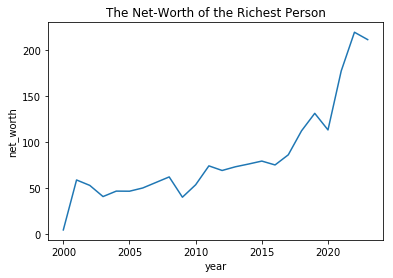

In [32]:
#The wealth of the richest person each year
sns.lineplot(data=richest_by_year[::-1], x="year", y="net_worth").set(title="The Net-Worth of the Richest Person")

Starting at the turn of the century, the wealth of the richest has steadily been on the rise. 

In [33]:
print("In {} the richest person was {} with a net worth of {}B, and {} years later in {}, the richest is {} with a net worth of {}B."
      .format(richest_by_year["year"][0], richest_by_year["full_name"][0], richest_by_year["net_worth"][0],
              (richest_by_year["year"].iloc[-1] - richest_by_year["year"].iloc[0]), richest_by_year["year"].iloc[-1],
              richest_by_year["full_name"].iloc[-1], richest_by_year["net_worth"].iloc[-1]))

In 2000 the richest person was Christoph Henkel with a net worth of 4.5B, and 23 years later in 2023, the richest is Bernard Arnault & family with a net worth of 211.0B.


In [34]:
print("The net worth of the richest has increased by {}% over the past 23 years".format(net_worth_change))

The net worth of the richest has increased by 4589.0% over the past 23 years


In [35]:
#Variable storing the number of billionaires by year
num_bil_by_year = business_industries_df.groupby("year")[["net_worth"]].count().rename(columns={"net_worth": "number of billionaires by year"})

[Text(0.5,1,'The Number of Billionaires in The World')]

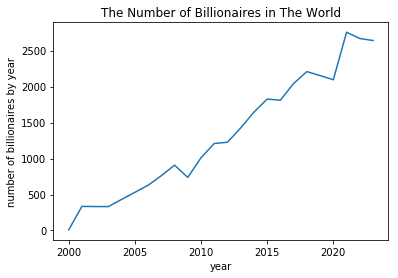

In [36]:
#Lineplot of the number of billionaires world-wide
sns.lineplot(data=num_bil_by_year[::-1], x="year", y="number of billionaires by year").set(title= "The Number of Billionaires in The World")

In [37]:
num_bil_by_year

,number of billionaires by year
year,
2000,8
2001,335
2002,333
2003,332
2004,432
2005,530
2006,628
2007,761
2008,908


Above is a table on the number of billionaires world-wide each year.

In [38]:
#Percent change of number of billionaires the number of billionaire over the past 23 years
percent_change_23_years = percent_change(num_bil_by_year.iloc[0], num_bil_by_year.iloc[-1])[0]

In [39]:
print("The number of the billionaires increased by {}% over the past 23 years".format(percent_change_23_years))

The number of the billionaires increased by 32900.0% over the past 23 years


In [40]:
#The number of billionaires 
num_bil_by_year["percent_change"] = num_bil_by_year['number of billionaires by year'].pct_change() * 100
num_bil_by_year

,number of billionaires by year,percent_change
year,,
2000,8,NaN
2001,335,4087.500000
2002,333,-0.597015
2003,332,-0.300300
2004,432,30.120482
2005,530,22.685185
2006,628,18.490566
2007,761,21.178344
2008,908,19.316689


In [41]:
print("In 2000 there were just 8 known billionaires; now recorded billionaires have increased immensely to 2640 a {}% increase.".format(num_bil_by_year["number of billionaires by year"].loc[2023]))

In 2000 there were just 8 known billionaires; now recorded billionaires have increased immensely to 2640 a 2640% increase.


In [42]:
print("While analyzing the changes in the number of billionaires year to year, it became apparent to me that most years there was an increase. With the most notable time being in 2001 where there was a {}% increase over the previous year. There are times however when there is a decrease. The largest decrease was in 2009 during the recession which resulted in a {}% reduction in billionaires worldwide."
      .format(num_bil_by_year["percent_change"].max(), num_bil_by_year["percent_change"].idxmax()))

While analyzing the changes in the number of billionaires year to year, it became apparent to me that most years there was an increase. With the most notable time being in 2001 where there was a 4087.5% increase over the previous year. There are times however when there is a decrease. The largest decrease was in 2009 during the recession which resulted in a 2001% reduction in billionaires worldwide.


#### Summary Report

In summary, the wealth of billionaires has changed quite a bit over the years. Starting at the turn of the century, there were only eight billionaires worldwide, and now there are over two thousand billionaires across 87 countries. Similarly, there was a large increase in how much wealth the richest have amassed during this time period, going from the richest person back in 2000 having a net worth of 4.5B to today having a net worth of 211B. And while many things have evolved over the years, some things have stayed the same. Finance and Investments, over the years, has consistently produced more billionaires than any other industry. However, only one person in the past 23 years reached the richest in the world statues from finance or investment. Rather, the overwhelming majority of those who have held the title made their money from technology. Therefore, if you want the highest chance of becoming a billionaire, go into the finance and investments sector, but if you want the highest chance of becoming the richest, your best bet would be to monopolize the tech space.